In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


In [2]:
iris=load_iris()
x=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.Series(iris.target,name='target')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)



Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



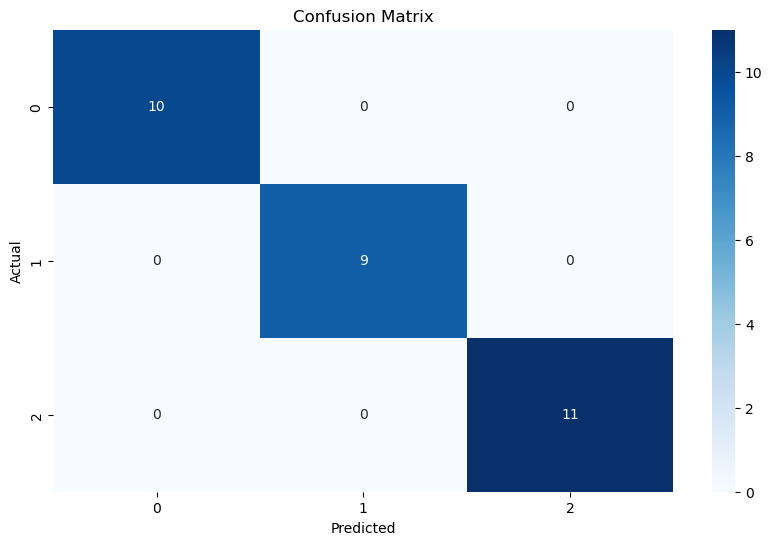

{'fit_time': array([0.00493264, 0.        , 0.00200677, 0.00275326, 0.        ]),
 'score_time': array([0.00392032, 0.011132  , 0.01543164, 0.0111897 , 0.01239371]),
 'test_accuracy': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'test_f1_weighted': array([0.96658312, 1.        , 0.93265993, 0.96658312, 1.        ])}

In [3]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
cross_validate(knn,x,y,cv=5,scoring=['accuracy','f1_weighted'])